In [1]:
import pandas as pd # importing the pandas lib

In [2]:
ctg = pd.read_csv(r"F:\carreer\CTG.csv") # loading the data

# Data cleaning and preprocessing 

In [3]:
ctg.shape # rows and cols

(2126, 4)

In [4]:
ctg.head(20) # taking idea of data

,LB,AC,FM,NSP
0,120,0.000,0.000,2
1,132,0.006,0.000,1
2,133,0.003,0.000,1
3,134,0.003,0.000,1
4,132,0.007,0.000,1
5,134,0.001,0.000,3
6,134,0.001,0.000,3
7,122,0.000,0.000,3
8,122,0.000,0.000,3
9,122,0.000,0.000,3


In [5]:
#LB : beats per second
#AC : acceleration per second
#FM : fetal movement per second
#NSP (Normal 1, suspect 2, pathalogical 3)
# medical preg woman


In [6]:
ctg.NSP.value_counts() 

1    1655
2     295
3     176
Name: NSP, dtype: int64

In [7]:
ctg.isnull().sum() # checking the nulls

LB     0
AC     0
FM     0
NSP    0
dtype: int64

# Data Sampling

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
ctg_train , ctg_test = train_test_split(ctg,test_size=0.2)

In [10]:
ctg_train_x = ctg_train.iloc[:,[0,1,2]]
ctg_train_y = ctg_train.iloc[:,-1]

In [11]:
ctg_test_x = ctg_test.iloc[:,[0,1,2]]
ctg_test_y = ctg_test.iloc[:,-1]

# model buiding using the KNN algo

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)

In [13]:
knn.fit(ctg_train_x , ctg_train_y)

KNeighborsClassifier(n_neighbors=11)

In [14]:
pred_ctg_knn = knn.predict(ctg_test_x)

# Confution matrix

In [15]:
from sklearn.metrics import confusion_matrix
tab_ctg = confusion_matrix(ctg_test_y , pred_ctg_knn)

In [16]:
tab_ctg

array([[296,  21,  12],
       [ 32,  35,   3],
       [ 13,   7,   7]], dtype=int64)

In [17]:
tab_ctg.diagonal().sum()*100/ tab_ctg.sum()

79.34272300469483

In [18]:
# here you can do the rerunning of the model 
# by solving the problem of imbalance in class 1 and class 2

# how to find k in Knn

In [19]:
# accuracy vs stability
# ---> 
# build you model 50 times for each model where k = 1,2,3,4,5....50
# find accuracy and then you do the plot


In [20]:
# user define fuction for running the model 50 times

acc = []

for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(ctg_train_x , ctg_train_y)
    pred_ctg_knn = knn.predict(ctg_test_x)
    tab_ctg = confusion_matrix(ctg_test_y , pred_ctg_knn)
    acc.append(tab_ctg.diagonal().sum()*100/ tab_ctg.sum())
acc   

[81.69014084507042,
 79.81220657276995,
 79.10798122065728,
 80.0469483568075,
 77.46478873239437,
 79.5774647887324,
 78.87323943661971,
 79.5774647887324,
 80.75117370892019,
 79.34272300469483,
 79.34272300469483,
 78.63849765258216,
 78.63849765258216,
 79.34272300469483,
 79.34272300469483,
 78.87323943661971,
 76.7605633802817,
 78.40375586854461,
 78.16901408450704,
 77.93427230046949,
 78.16901408450704,
 78.16901408450704,
 78.16901408450704,
 77.2300469483568,
 77.2300469483568,
 77.2300469483568,
 78.40375586854461,
 76.52582159624413,
 76.99530516431925,
 76.52582159624413,
 78.16901408450704,
 77.93427230046949,
 77.93427230046949,
 78.40375586854461,
 77.69953051643192,
 77.69953051643192,
 77.69953051643192,
 77.69953051643192,
 77.93427230046949,
 77.46478873239437,
 77.2300469483568,
 77.46478873239437,
 77.93427230046949,
 77.69953051643192,
 77.69953051643192,
 77.69953051643192,
 77.93427230046949,
 77.93427230046949,
 77.93427230046949,
 77.93427230046949]

# know plotting

In [21]:
k_values = list(range(1,51))

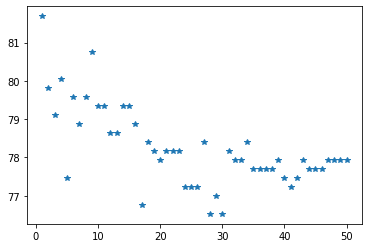

In [22]:
import matplotlib.pyplot as plt
plt.plot(k_values , acc , "*")

# Here we will just check the best accuracy for model though the user define code and with data visualization